-----

# 멕시코 음식 프랜차이즈 Chipotle의 주문 데이터 분석하기
<img src="1.jpg" width="800" height="500"/>

-----

# <탐색> : 데이터의 기초 정보 살펴보기

### [Chipotle 데이터셋의 기본 정보]

In [1]:
# -*- coding: utf-8 -*-

import pandas as pd

# read_csv 함수로 데이터를 Dataframe 형태로 불러옵니다.
file_path = 'chipotle.tsv'
chipo = pd.read_csv(file_path, sep = '\t')
chipo

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


In [2]:
chipo.groupby('item_name').quantity.sum().sort_values(ascending = False)[:10]

item_name
Chicken Bowl                    761
Chicken Burrito                 591
Chips and Guacamole             506
Steak Burrito                   386
Canned Soft Drink               351
Chips                           230
Steak Bowl                      221
Bottled Water                   211
Chips and Fresh Tomato Salsa    130
Canned Soda                     126
Name: quantity, dtype: int64

In [3]:
print(chipo.shape)
print(chipo.info())

(4622, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB
None


#### order_id : 주문번호 
#### quantity : 아이템의 주문 수량
#### item_name : 주문한 아이템의 이름
#### choice_description : 주문한 아이템의 상세 선택옵션
#### item_price : 주문 아이템의 가격정보

### [Chipotle 데이터셋의 행과 열, 데이터]

In [4]:
chipo.index

RangeIndex(start=0, stop=4622, step=1)

##### 이제 데이터의 수치적 특징 탐색을 위한 간단한 질문들을 정의합니다.

- quantity와 item_price의 요약 통계
- order_id와 item_name의 개수

### [Chipotle 데이터셋의 수치적 특징 파악]

##### describe 함수로 요약 통계량 출력하기

In [5]:
chipo['order_id'] = chipo['order_id'].astype(str)
chipo['order_id']

0          1
1          1
2          1
3          1
4          2
        ... 
4617    1833
4618    1833
4619    1834
4620    1834
4621    1834
Name: order_id, Length: 4622, dtype: object

In [6]:
chipo.describe()

,quantity
count,4622.000000
mean,1.075725
std,0.410186
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,15.000000


##### unique 함수로 범주형 피처의 개수 출력하기

In [7]:
print(len(chipo['order_id'].unique()))
print(len(chipo['item_name'].unique()))

1834
50


- `pandas에서 유용하게 사용되는 함수 value_counts()와 unique()의 차이점 '
    - 각 함수는 어떤 데이터 타입에 적용이 되는지, 어떤 기능을 가지고 있는지, 정확히 어떤 결과값을 반환하는지 실행

# <인사이트의 발견> : 탐색과 시각화

-----
##### 다음으로, 인사이트를 발견할 수 있을만한 개념적 질문들을 정의합니다.

- 가장 많이 주문한 item은 무엇인지
- item당 주문의 총량은 얼마인지

### [가장 많이 주문한 item]

In [8]:
item_count = chipo['item_name'].value_counts()
item_count
#item_count.index[0]

Chicken Bowl                             726
Chicken Burrito                          553
Chips and Guacamole                      479
Steak Burrito                            368
Canned Soft Drink                        301
Steak Bowl                               211
Chips                                    211
Bottled Water                            162
Chicken Soft Tacos                       115
Chips and Fresh Tomato Salsa             110
Chicken Salad Bowl                       110
Canned Soda                              104
Side of Chips                            101
Veggie Burrito                            95
Barbacoa Burrito                          91
Veggie Bowl                               85
Carnitas Bowl                             68
Barbacoa Bowl                             66
Carnitas Burrito                          59
Steak Soft Tacos                          55
6 Pack Soft Drink                         54
Chips and Tomatillo Red Chili Salsa       48
Chicken Cr

In [9]:
item_count = chipo['item_name'].value_counts()[:10]
for idx, (val, cnt) in enumerate(item_count.items(), 1):
    print("Top", idx, ":", val, cnt)

Top 1 : Chicken Bowl 726
Top 2 : Chicken Burrito 553
Top 3 : Chips and Guacamole 479
Top 4 : Steak Burrito 368
Top 5 : Canned Soft Drink 301
Top 6 : Steak Bowl 211
Top 7 : Chips 211
Top 8 : Bottled Water 162
Top 9 : Chicken Soft Tacos 115
Top 10 : Chips and Fresh Tomato Salsa 110


In [10]:
item_count = chipo['item_name'].value_counts()[:10]
item_count

Chicken Bowl                    726
Chicken Burrito                 553
Chips and Guacamole             479
Steak Burrito                   368
Canned Soft Drink               301
Steak Bowl                      211
Chips                           211
Bottled Water                   162
Chicken Soft Tacos              115
Chips and Fresh Tomato Salsa    110
Name: item_name, dtype: int64

In [11]:
chipo['item_name'].value_counts().index.tolist()[0:10] #index를 list로 만드는 함수
#chipo['item_name'].value_counts().index[0:10]

['Chicken Bowl',
 'Chicken Burrito',
 'Chips and Guacamole',
 'Steak Burrito',
 'Canned Soft Drink',
 'Steak Bowl',
 'Chips',
 'Bottled Water',
 'Chicken Soft Tacos',
 'Chips and Fresh Tomato Salsa']

-----

### [item당 주문 개수와 총량 구하기]

In [12]:
chipo['order_id'] = chipo['order_id'].astype(int)
order_num = chipo.item_name.value_counts()

In [13]:
chipo_total_num = chipo.groupby('item_name').quantity.sum().sort_values(ascending = False)

### [시각화로 분석 결과 살펴보기]
- 지금까지의 분석 결과를 간단한 시각화로 표현

<AxesSubplot:xlabel='item_name'>

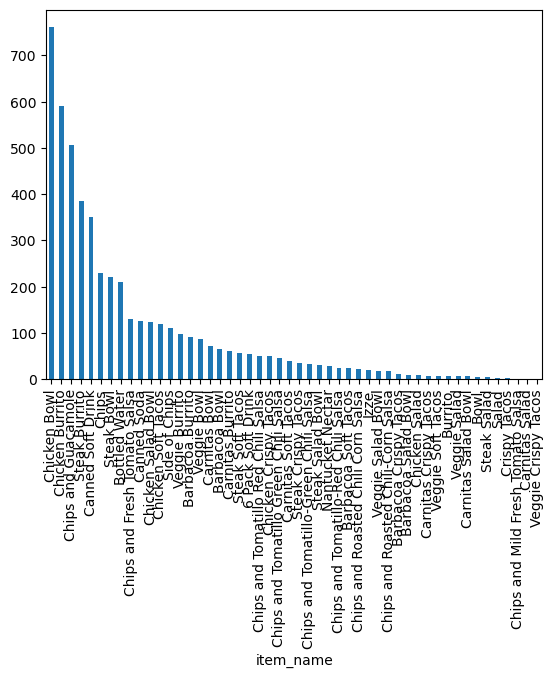

In [14]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
chipo_total_num.plot.bar()

<AxesSubplot:>

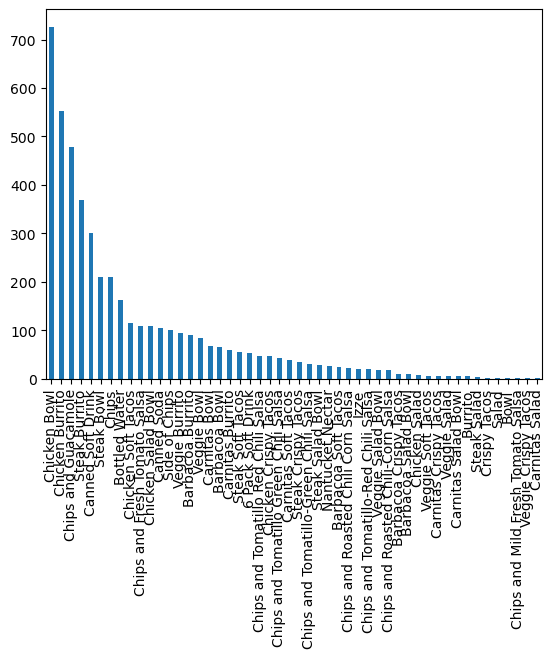

In [15]:
order_num.plot.bar()

## 실습

### 1. [groupby 를 pivot_table로 수정하여 결과를 나타내시오]

-----

In [16]:
chipo.pivot_table(index = 'item_name',values = 'order_id', aggfunc = 'count')

,order_id
item_name,
6 Pack Soft Drink,54
Barbacoa Bowl,66
Barbacoa Burrito,91
Barbacoa Crispy Tacos,11
Barbacoa Salad Bowl,10
Barbacoa Soft Tacos,25
Bottled Water,162
Bowl,2
Burrito,6


-----

# <데이터 전처리> : 함수를 이용

### [apply와 lambda 함수를 이용한 데이터 전처리]

In [17]:
chipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int32 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int32(1), int64(1), object(3)
memory usage: 162.6+ KB


-----

# <탐색적 분석> : 개념적 탐색

##### 데이터를 이해하기 위한 조금 더 복잡한 질문들로 탐색적 데이터 분석 연습하기


- 주문당 평균 계산금액 출력하기
- 한 주문에 10달러 이상 사용한 주문의 id들 출력하기
- 각 아이템의 가격 구하기
- 가장 비싼 주문에서 item이 몇개 팔렸는지 구하기
- “Veggie Salad Bowl”이 몇 번 주문되었는지 구하기
- “Chicken Bowl”을 2개 이상 주문한 주문 횟수 구하기
-----

### [주문당 평균 계산금액 출력하기]

In [18]:
chipo['item_price'] = chipo['item_price'].str.replace('$','')

C:\Users\82109\AppData\Local\Temp\ipykernel_9916\2905591823.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  chipo['item_price'] = chipo['item_price'].str.replace('$','')


0        2.39
1        3.39
2        3.39
3        2.39
4       16.98
        ...  
4617    11.75
4618    11.75
4619    11.25
4620     8.75
4621     8.75
Name: item_price, Length: 4622, dtype: float64

In [24]:
chipo

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75


In [22]:
chipo['item_price'] = chipo['item_price'].astype(float)

In [25]:
chipo.groupby('order_id').item_price.mean()

order_id
1        2.890000
2       16.980000
3        6.335000
4       10.500000
5        6.850000
          ...    
1830    11.500000
1831     4.300000
1832     6.600000
1833    11.750000
1834     9.583333
Name: item_price, Length: 1834, dtype: float64

### [한 주문에 10달러 이상 사용한 주문 번호(id) 출력하기]

In [34]:
new_data = chipo.groupby('order_id').item_price.sum().to_frame()

In [35]:
new_data[chipo.groupby('order_id').item_price.sum().to_frame()>= 10]

,item_price
order_id,
1,11.56
2,16.98
3,12.67
4,21.00
5,13.70
...,...
1830,23.00
1831,12.90
1832,13.20


### [각 아이템의 가격 구하기]

In [37]:
chipo.groupby('item_name').item_price.min()

item_name
6 Pack Soft Drink                        6.49
Barbacoa Bowl                            8.69
Barbacoa Burrito                         8.69
Barbacoa Crispy Tacos                    8.99
Barbacoa Salad Bowl                      9.39
Barbacoa Soft Tacos                      8.99
Bottled Water                            1.09
Bowl                                     7.40
Burrito                                  7.40
Canned Soda                              1.09
Canned Soft Drink                        1.25
Carnitas Bowl                            8.99
Carnitas Burrito                         8.69
Carnitas Crispy Tacos                    8.99
Carnitas Salad                           8.99
Carnitas Salad Bowl                      9.39
Carnitas Soft Tacos                      8.99
Chicken Bowl                             8.19
Chicken Burrito                          8.19
Chicken Crispy Tacos                     8.49
Chicken Salad                            8.19
Chicken Salad Bowl      

-----

## 실습

### 1. [가장 비싼 주문에서 item이 총 몇개 팔렸는지 구하기]

In [60]:
new_data.idxmax()

item_price    926
dtype: int64

In [65]:
chipo[chipo['order_id'] == 926].quantity.value_counts()

1    23
Name: quantity, dtype: int64

### 2. [“Veggie Salad Bowl”이 몇 번 주문되었는지 구하기]

In [70]:
chipo[chipo['item_name'] == 'Veggie Salad Bowl'].order_id.count()

18

### 3. [“Chicken Bowl”을 2개 이상 주문한 주문 횟수 구하기]

- 1) Chicken Bowl”을 2개 이상 주문한 주문 횟수
- 2) Chicken Bowl”을 2개 이상 주문한 고객들의 "Chicken Bowl" 메뉴의 총 주문 수량

In [73]:
df = chipo[chipo['item_name'] == 'Chicken Bowl']

In [75]:
df[df['quantity'] >= 2].count()

order_id              33
quantity              33
item_name             33
choice_description    33
item_price            33
dtype: int64